# 1) Defining the problem

APS Failure and Operational Data for Scania Trucks.<br>
This data set is created by Scania CV AB to analyse APS failures and operational data for
Scania Trucks. The **positive** class in the dataset represents component failures related to APS
system and the **negative** class represents failures related to other systems.

## Challenge metric

Cost-metric of miss-classification:

|     | Predicted class | True class |
| --- | --- | --- |
|     | pos | neg |
| pos | -   | Cost_1 |
| neg | Cost_2 | - |

Cost_1 = 10 and cost_2 = 500

The total cost of a prediction model the sum of 'Cost_1'
multiplied by the number of Instances with type 1 failure
and 'Cost_2' with the number of instances with type 2 failure,
resulting in a 'Total_cost'.

In this case Cost_1 refers to the cost that an unnessecary
check needs to be done by an mechanic at an workshop, while
Cost_2 refer to the cost of missing a faulty truck,
which may cause a breakdown.

Total_cost = Cost_1*No_Instances + Cost_2*No_Instances.

The aim of this challenge metric is to encourage the development of a model that can minimize the total cost, taking into account the costs associated with the different types of errors that the model can make.

## 2) Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing

### 2.1) Load the Data

In [2]:
# Load data into a pandas DataFrame
df = pd.read_csv("dataset/aps_failure_training_set.csv",skiprows=20)

In [3]:
# View the first few rows of the data
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### 2.2) Dimensions of the data

In [4]:
# Check the dimensions of the data
print('Number of rows    : ', df.shape[0])
print('Number of columns : ', df.shape[1])

Number of rows    :  60000
Number of columns :  171


### 2.3) Data types

In [5]:
# Check the data types of each column
# Get the data types of each column
data_types = df.dtypes

# Count the number of columns with each data type
data_type_counts = data_types.value_counts()

# Print the results
print("Data Type Counts:")
print(data_type_counts)

Data Type Counts:
object    170
int64       1
Name: count, dtype: int64


The data type 'object' refers to a column of strings (text) or a mix of strings and other data types.

### 2.4) Check for empty columns

In [6]:
# replace na to np.na
df.replace("na", np.nan, inplace=True)

# Count the number of empty values in each column
empty_counts = df.isna().sum()

# Count the number of columns with empty values
num_empty_cols = sum(empty_counts > 0)

# Print the results
print("Number of columns with empty values:", num_empty_cols)

Number of columns with empty values: 169


### 2.5) Check the target column (class)

In [7]:
# Count the number of empty values in class column
empty_counts = df["class"].isna().sum()

# Print the results
print("Number of empty values in column class:", empty_counts)

Number of empty values in column class: 0


In [8]:
# Check the distribution on column class
print(df['class'].value_counts())

class
neg    59000
pos     1000
Name: count, dtype: int64


<BarContainer object of 2 artists>

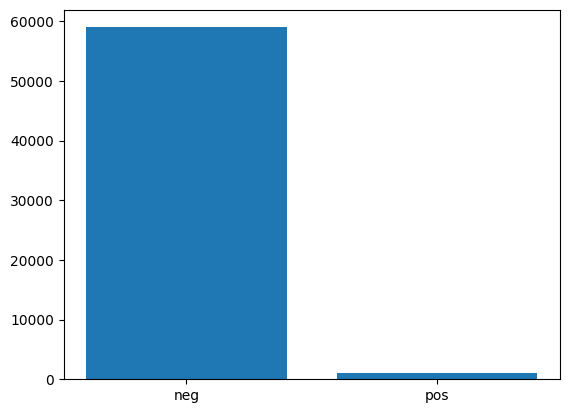

In [9]:
plt.bar(list(df['class'].value_counts().keys()), df['class'].value_counts())

### 2.6) Check the Continuous and Discrete Variables

In [10]:
# Make a copy of the DataFrame
df2 = df.copy()

# Check the distribution of Continuous and Discrete Variables
X = df2.drop('class', axis=1)
Y = df2[['class']]

float_cols = []
object_cols = []
int_cols = []
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col])
        if (X[col] % 1 > 0).any():
            # it is float
            float_cols.append(col)
        else:
            int_cols.append(col)
    except:
        object_cols.append(col)
        
print("Continuous Variables")
display(X[float_cols])

print("\nDiscrete Variables")
display(X[int_cols])

if len(object_cols)>1:
    display(X[object_cols])

Continuous Variables


,bt_000,ci_000,cj_000,ck_000,ec_00
0,76698.08,5245752.00,0.00,916567.68,2445.80
1,33057.51,2291079.36,0.00,643536.96,2211.76
2,41040.08,2322692.16,0.00,236099.52,1018.64
3,12.69,2135.04,0.00,4525.44,1.08
4,60874.03,3565684.80,0.00,379111.68,1116.06
...,...,...,...,...,...
59995,153001.45,8289544.32,0.00,1529548.80,2912.04
59996,2285.92,123344.64,0.00,11387.52,80.40
59997,112.49,7518.72,4221.12,10493.76,2.76
59998,80292.76,4776505.92,106006.08,1048805.76,1659.70



Discrete Variables


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


### 2.7) Check for duplicated rows

In [11]:
# Check for duplicated rows
print('Number of duplicated rows: ', df.duplicated().sum())

Number of duplicated rows:  0


## 3) Cleaning the data

### 3.1) Cleaning the empty values

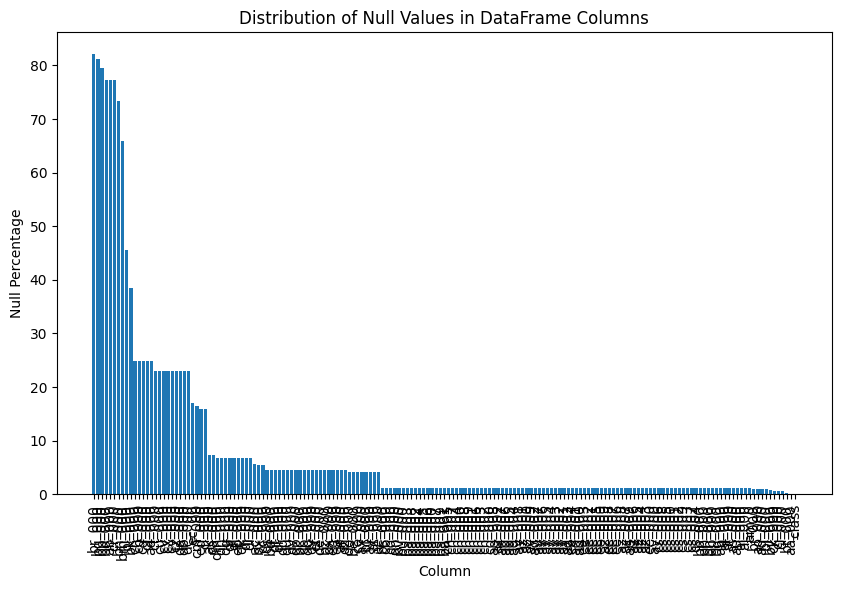

In [12]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().sum() / len(df) * 100

# Sort the null_percentage Series in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Create a bar chart of the null percentage distribution
plt.figure(figsize=(10,6))
plt.bar(null_percentage_sorted.index, null_percentage_sorted)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Null Percentage')
plt.title('Distribution of Null Values in DataFrame Columns')
plt.show()

In [13]:
# Find the columns that contain 70% or more null values
null_cols = null_percentage[null_percentage >= 70].index

# Store the names of the columns to be dropped in a list
cols_to_drop = list(null_cols)

# Drop the identified columns from the DataFrame
df.drop(columns=null_cols, inplace=True)

# Print the names of the dropped columns
print('Dropped columns:', cols_to_drop)

Dropped columns: ['ab_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']


### 3.2) Impute missing values using mean or median

In [14]:
# Impute missing values using mean or median
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'float64':
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
# Count the number of empty values in each column
empty_counts = df.isna().sum()

# Count the number of columns with empty values
num_empty_cols = sum(empty_counts > 0)

# Print the results
print("Number of columns with empty values:", num_empty_cols)

Number of columns with empty values: 0


Using the median value as an imputation method for missing values in numerical data columns has several advantages. **First**, it is simple to calculate and implement. **Second**, it is less sensitive to outliers than the mean. **Third**, it preserves the original distribution of the data, especially when the data is skewed or has a heavy-tailed distribution. Finally, it is a suitable imputation method when the variable has a reasonable number of missing values and the missing data are randomly distributed.

The mode is a suitable imputation method for missing values in categorical data for several reasons. **First**, the mode preserves the original distribution of the data, especially when the data has a few unique categories. **Second**, it is easy to calculate and implement. **Third**, it works well for variables with a few missing values, and it can handle missing data that are randomly distributed.

### 3.3) Convert the target variable to binary

In [16]:
# Convert the target variable to binary
df['class'] = df['class'].map({'neg': 0, 'pos': 1})

In [17]:
print(df['class'].value_counts())

class
0    59000
1     1000
Name: count, dtype: int64


### 3.4) Normalize the data

In [18]:
X = df.drop('class', axis=1)
Y = df[['class']]

In [19]:
df_test = X.astype('float64')

In [20]:
# Check the data types of each column
# Get the data types of each column
data_types = df_test.dtypes

# Count the number of columns with each data type
data_type_counts = data_types.value_counts()

# Print the results
print("Data Type Counts:")
print(data_type_counts)

Data Type Counts:
float64    163
Name: count, dtype: int64


In [21]:
X_scaled = (df_test-df_test.mean())/df_test.std()
X_scaled

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.119380,2.310205,-0.004084,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,-0.167255,...,0.695654,0.526362,0.241070,0.071940,0.009234,-0.107312,-0.143002,-0.175697,-0.020257,-0.023540
1,-0.180695,-0.432855,-0.004092,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,-0.175299,...,-0.016615,-0.056778,-0.126810,-0.129199,-0.183954,-0.152005,-0.088551,-0.143926,-0.020257,-0.023540
2,-0.125810,-0.432855,-0.004089,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,-0.182331,...,-0.141850,-0.090532,-0.014412,0.017950,-0.008073,-0.107274,-0.094025,-0.164810,-0.020257,-0.023540
3,-0.407925,-0.432855,-0.004090,-0.041322,-0.002669,-0.010762,-0.028369,-0.056928,-0.115222,-0.182093,...,-0.382837,-0.385997,-0.379022,-0.349159,-0.309590,-0.199214,-0.306731,-0.175697,0.916825,3.685297
4,0.010572,-0.432854,-0.004079,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,-0.164502,...,0.157828,0.038882,-0.030490,-0.037966,-0.039840,-0.017943,0.663590,-0.149899,-0.020257,-0.023540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.644059,-0.432854,-0.004087,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.112257,-0.158002,...,0.485205,0.662290,0.730750,0.742880,0.649062,0.218393,1.702631,0.429821,-0.020257,-0.023540
59996,-0.392288,2.310205,-0.004086,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,-0.182985,...,-0.373847,-0.373580,-0.360902,-0.287861,-0.309471,-0.199214,-0.306731,-0.175697,-0.020257,-0.023540
59997,-0.407237,2.310205,-0.004092,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,-0.183018,...,-0.382357,-0.385368,-0.378683,-0.349069,-0.309462,-0.197688,-0.306731,-0.175697,-0.020257,-0.023540
59998,0.144093,2.310205,-0.004078,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,-0.182890,...,0.225079,0.025685,-0.080305,-0.146851,-0.126810,-0.103173,1.487166,8.051406,-0.020257,-0.023540


In [22]:
df_train = pd.concat([Y, X_scaled], axis=1)

In [23]:
df_train

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.119380,2.310205,-0.004084,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,0.695654,0.526362,0.241070,0.071940,0.009234,-0.107312,-0.143002,-0.175697,-0.020257,-0.023540
1,0,-0.180695,-0.432855,-0.004092,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.016615,-0.056778,-0.126810,-0.129199,-0.183954,-0.152005,-0.088551,-0.143926,-0.020257,-0.023540
2,0,-0.125810,-0.432855,-0.004089,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.141850,-0.090532,-0.014412,0.017950,-0.008073,-0.107274,-0.094025,-0.164810,-0.020257,-0.023540
3,0,-0.407925,-0.432855,-0.004090,-0.041322,-0.002669,-0.010762,-0.028369,-0.056928,-0.115222,...,-0.382837,-0.385997,-0.379022,-0.349159,-0.309590,-0.199214,-0.306731,-0.175697,0.916825,3.685297
4,0,0.010572,-0.432854,-0.004079,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,0.157828,0.038882,-0.030490,-0.037966,-0.039840,-0.017943,0.663590,-0.149899,-0.020257,-0.023540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.644059,-0.432854,-0.004087,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.112257,...,0.485205,0.662290,0.730750,0.742880,0.649062,0.218393,1.702631,0.429821,-0.020257,-0.023540
59996,0,-0.392288,2.310205,-0.004086,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.373847,-0.373580,-0.360902,-0.287861,-0.309471,-0.199214,-0.306731,-0.175697,-0.020257,-0.023540
59997,0,-0.407237,2.310205,-0.004092,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.382357,-0.385368,-0.378683,-0.349069,-0.309462,-0.197688,-0.306731,-0.175697,-0.020257,-0.023540
59998,0,0.144093,2.310205,-0.004078,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,0.225079,0.025685,-0.080305,-0.146851,-0.126810,-0.103173,1.487166,8.051406,-0.020257,-0.023540


In [24]:
#Correlation matrix
df_train.corr()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,1.000000,0.536978,-0.050996,-0.000530,0.005541,0.016250,0.012353,0.191084,0.339956,0.433050,...,0.443960,0.428899,0.416096,0.485723,0.415262,0.160296,0.235401,0.115925,0.013650,0.012809
aa_000,0.536978,1.000000,-0.063876,-0.001591,0.043095,0.062855,0.018549,0.142645,0.284797,0.493749,...,0.732113,0.735974,0.714692,0.724146,0.723972,0.603873,0.469828,0.247149,0.012409,0.024387
ac_000,-0.050996,-0.063876,1.000000,-0.001765,-0.004250,-0.009480,0.017155,-0.007334,-0.022708,-0.047927,...,-0.045942,-0.039194,-0.038434,-0.038858,-0.046700,-0.048537,-0.003676,0.013764,-0.006262,0.014747
ad_000,-0.000530,-0.001591,-0.001765,1.000000,-0.000168,-0.000209,-0.000043,-0.000115,-0.000231,-0.000470,...,-0.001517,-0.001519,-0.001485,-0.001230,-0.001197,-0.000800,-0.001235,-0.000716,-0.000082,-0.000096
ae_000,0.005541,0.043095,-0.004250,-0.000168,1.000000,0.823123,-0.000445,-0.001072,0.002204,0.022460,...,0.010203,0.016833,0.011380,0.026139,0.060469,0.035504,-0.009631,-0.007218,0.070869,0.041725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.160296,0.603873,-0.048537,-0.000800,0.035504,0.047859,0.000331,0.044187,0.182701,0.505149,...,0.455217,0.447196,0.438082,0.380331,0.546208,1.000000,0.225459,0.061849,-0.001728,0.000403
ee_008,0.235401,0.469828,-0.003676,-0.001235,-0.009631,-0.012346,-0.000786,0.004928,0.009565,0.021456,...,0.454522,0.482070,0.460214,0.407634,0.374543,0.225459,1.000000,0.710163,-0.005961,-0.002840
ee_009,0.115925,0.247149,0.013764,-0.000716,-0.007218,-0.008996,-0.001209,-0.004274,-0.009410,-0.019093,...,0.228780,0.239826,0.225169,0.191196,0.164290,0.061849,0.710163,1.000000,-0.003439,-0.000971
ef_000,0.013650,0.012409,-0.006262,-0.000082,0.070869,0.106312,-0.000078,0.001793,0.006870,0.012996,...,0.003699,0.011854,0.003276,0.032384,0.004631,-0.001728,-0.005961,-0.003439,1.000000,0.282201


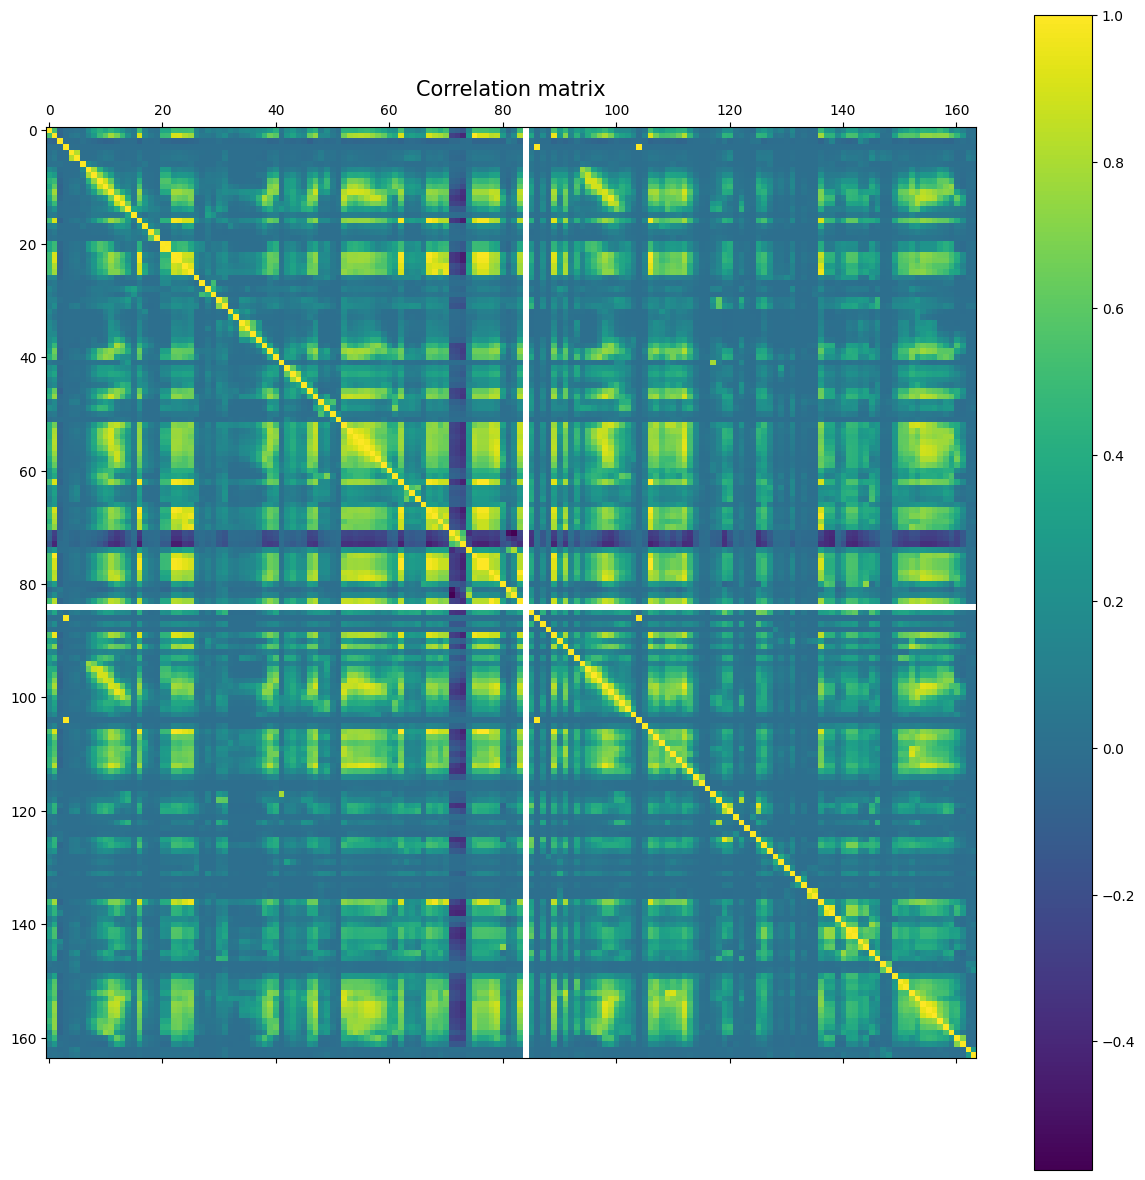

In [25]:
#plot correlation matrix
f=plt.figure(figsize=(15,15))
ax=f.add_subplot(111)
cax=ax.matshow(df_train.corr(),interpolation='nearest')
f.colorbar(cax)
plt.title('Correlation matrix',fontsize=15)
plt.show();

## 4) Model training

### 4.1) Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplot

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.50, random_state=42)

In [28]:
# Check for NaN values in X
print(np.isnan(X_train).any().value_counts())

False    162
True       1
Name: count, dtype: int64


In [29]:
# Check for NaN values in X
nan_cols = np.isnan(X_train.values).any(axis=0)

# Drop columns that contain NaN values
X_train = X_train.iloc[:, ~nan_cols]

In [30]:
# Check for NaN values in X
print(np.isnan(X_train).any().value_counts())

False    162
Name: count, dtype: int64


In [31]:
sm=SMOTE(random_state=42)
#Resample the train dataset
X_train,y_train=sm.fit_resample(X_train,y_train)
print("Resampled train dataset shape :",X_train.shape,y_train.shape);

Resampled train dataset shape : (59014, 162) (59014, 1)


In [32]:
# Check for NaN values in X
nan_cols = np.isnan(X_test.values).any(axis=0)

# Drop columns that contain NaN values
X_test = X_test.iloc[:, ~nan_cols]

In [33]:
y_1d = y_train.to_numpy().ravel()
print(y_1d.shape) 

(59014,)


In [34]:
lr=LogisticRegression()
lr.fit(X_train,y_1d);

/Users/baihaqi/anaconda3/envs/APS/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#predict on test data
y_pred_lr=lr.predict(X_test)

### 4.2) Evaluating the model (Linear Regression)

In [36]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred_lr,labels=[0,1])
cm

array([[28878,   615],
       [   72,   435]])

<Axes: title={'center': 'Confusion matrix for Logistic Regression model'}, xlabel='Predicted label', ylabel='True label'>

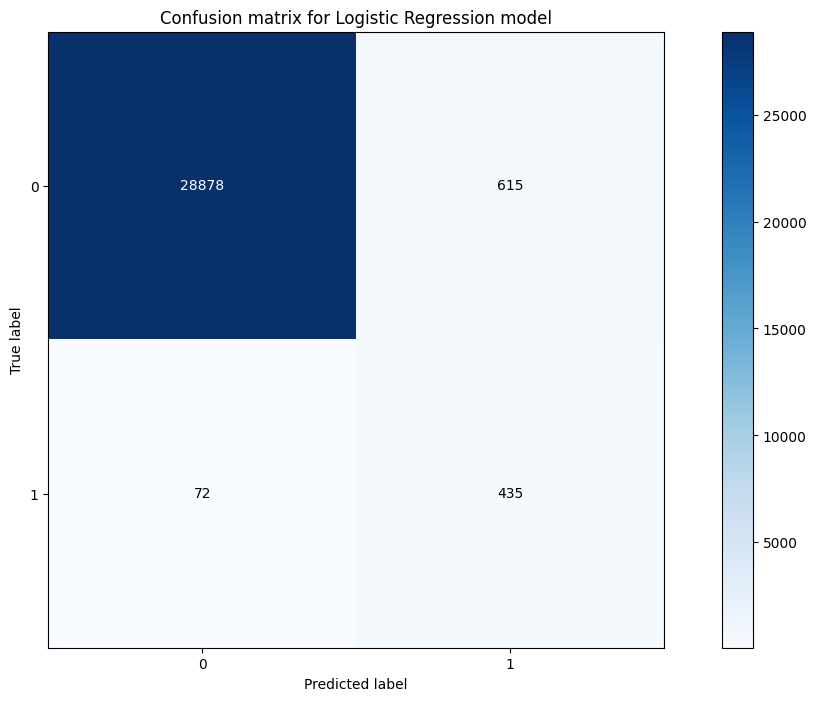

In [37]:
#Plot confusion matrix
skplot.metrics.plot_confusion_matrix(y_test,y_pred_lr,figsize=(15,8),title='Confusion matrix for Logistic Regression model')

In [38]:
cost_1 = 10 
cost_2 = 500
total_cost = 615*cost_1 + 72*cost_2
total_cost

42150

### 4.3) Support Vector Classification (SVC)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
y_1d = y_train.to_numpy().ravel()
print(y_1d.shape) # prints (4,)

(59014,)


In [41]:
# SVM model
svc = SVC()
# 5 fold Cross Validation
cv_scores = cross_val_score(svc, X_train, y_1d, cv=5)
# Result
print("cv score : ",cv_scores)
print('average cv score : {}'.format(np.mean(cv_scores)))

cv score :  [0.9783106  0.97737863 0.97966619 0.97559942 0.97822403]
average cv score : 0.9778357743629555


In [42]:
svc.fit(X_train,y_1d);

In [43]:
#predict on test data
y_pred_svc=svc.predict(X_test)

### 4.4) Evaluating the model (Support Vector Classification (SVC))

In [44]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred_svc,labels=[0,1])
cm

array([[28981,   512],
       [   92,   415]])

<Axes: title={'center': 'Confusion matrix for SVC model'}, xlabel='Predicted label', ylabel='True label'>

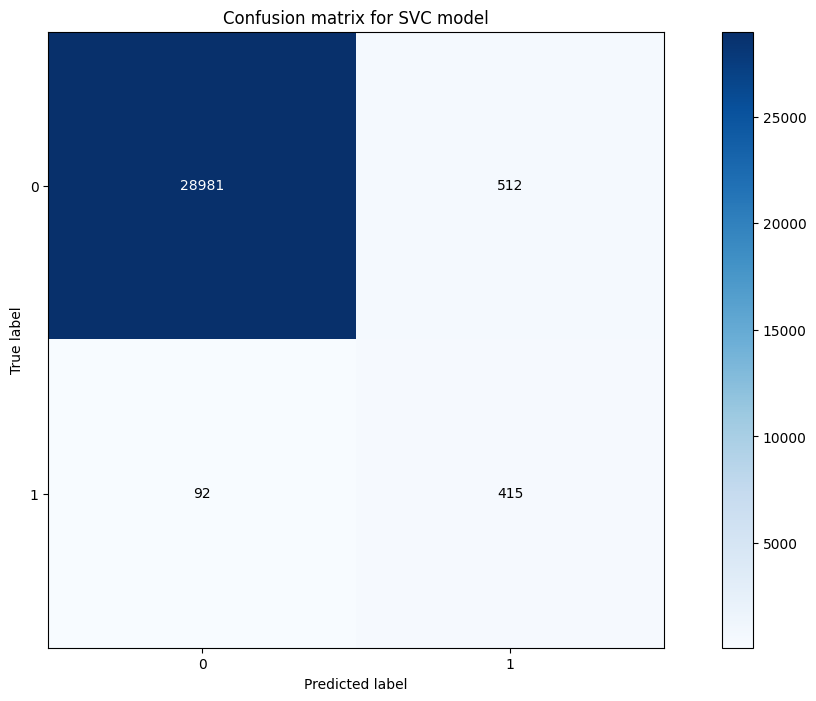

In [45]:
#Plot confusion matrix
skplot.metrics.plot_confusion_matrix(y_test,y_pred_svc,figsize=(15,8),title='Confusion matrix for SVC model')

In [46]:
cost_1 = 10 
cost_2 = 500
total_cost = 512*cost_1 + 92*cost_2
total_cost

51120

## 5) Fine tuning the model

In [47]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [48]:
y_1d = y_train.to_numpy().ravel()
print(y_1d.shape) 

(59014,)


In [49]:
model = LogisticRegression()
model.fit(X_train, y_1d)

print("Test Accuracy: {:.4f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 97.7100%


/Users/baihaqi/anaconda3/envs/APS/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
n_components = 10

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i + 1) for i in range(n_components)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i + 1) for i in range(n_components)])

In [51]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-16.065644,0.679868,0.794612,-2.212041,1.426998,-0.031354,0.166979,-0.025174,0.283619,0.316572
1,-11.417321,0.044449,1.224979,1.617897,1.909380,-0.725854,0.504579,0.293316,0.645232,-1.165423
2,-16.048133,0.683969,0.781991,-2.175408,1.424917,-0.025928,0.133703,-0.036228,0.291005,0.315171
3,-9.069272,1.462515,-2.517500,-0.009908,1.415647,-0.371324,0.121711,0.992628,0.340430,-0.650180
4,-10.943120,1.799565,0.102394,0.535919,0.914465,1.328222,0.248954,-0.297566,-1.405090,-0.122429
...,...,...,...,...,...,...,...,...,...,...
59009,1.641820,2.364190,-4.585179,1.479599,-13.352717,-1.389860,-8.139775,-1.049011,1.432797,0.865875
59010,60.675026,17.545452,-39.944262,26.643910,14.453430,11.507470,-19.845057,-10.637707,-1.241759,-8.924552
59011,5.451788,-4.288599,2.232198,4.006340,-21.762368,2.900438,-7.873673,-4.839713,-2.990334,3.745774
59012,4.150204,-4.578122,0.284146,-5.092946,-0.216245,-1.995385,1.332451,-1.293284,0.887823,-2.912831


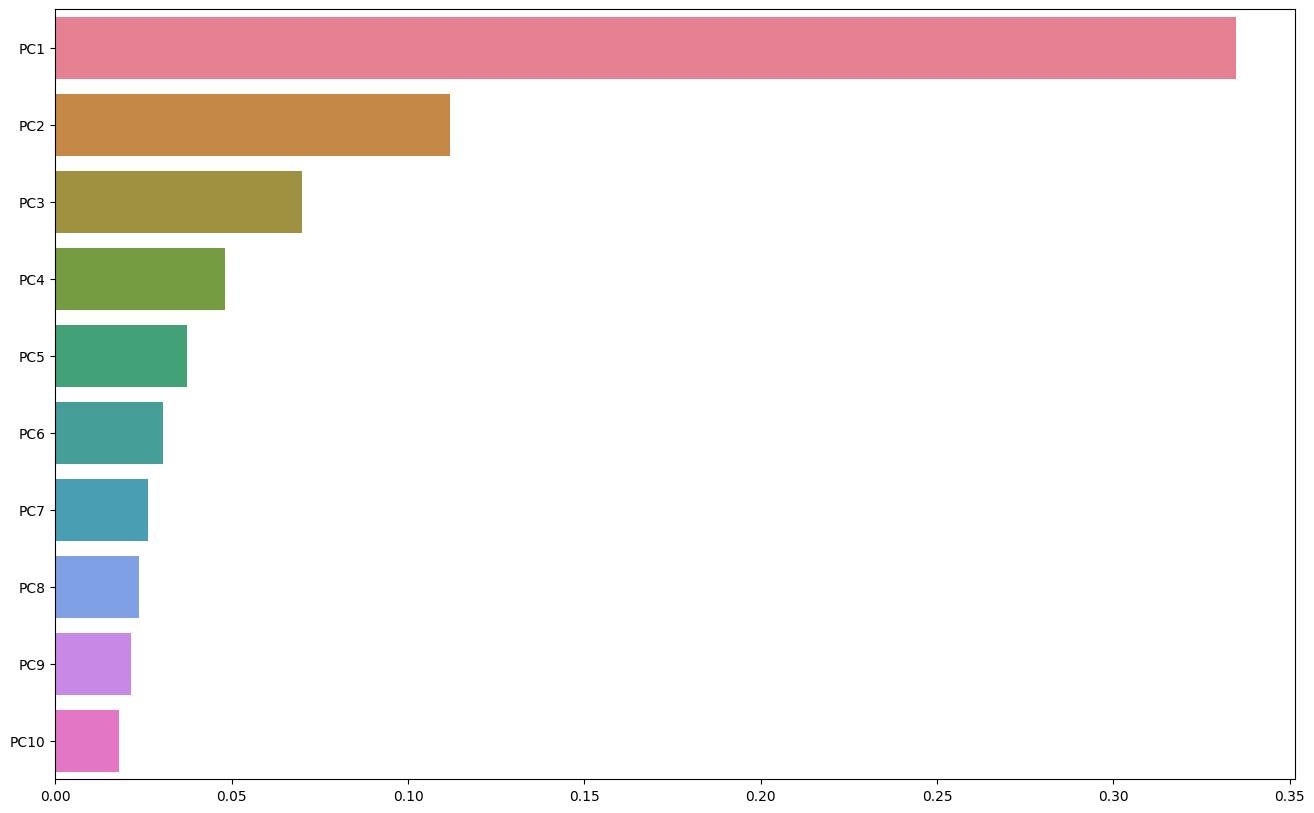

In [52]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(n_components)], orient='h', palette='husl')
plt.show()

In [53]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy (Original Data): {:.4f}%".format(model.score(X_test, y_test) * 100))
print(" Test Accuracy (Reduced Data): {:.4f}%".format(reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (Original Data): 97.7100%
 Test Accuracy (Reduced Data): 96.5167%


/Users/baihaqi/anaconda3/envs/APS/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
print("Ratio of memory usage in bytes (original to reduced): {:.5f}".format(X_train.memory_usage().sum() / X_train_reduced.memory_usage().sum()))

Ratio of memory usage in bytes (original to reduced): 16.19959


In [55]:
#predict on test data
y_pred_pca=model.predict(X_test)

In [56]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred_pca,labels=[0,1])
cm

array([[28878,   615],
       [   72,   435]])

<Axes: title={'center': 'Confusion matrix for Logistic Regression model'}, xlabel='Predicted label', ylabel='True label'>

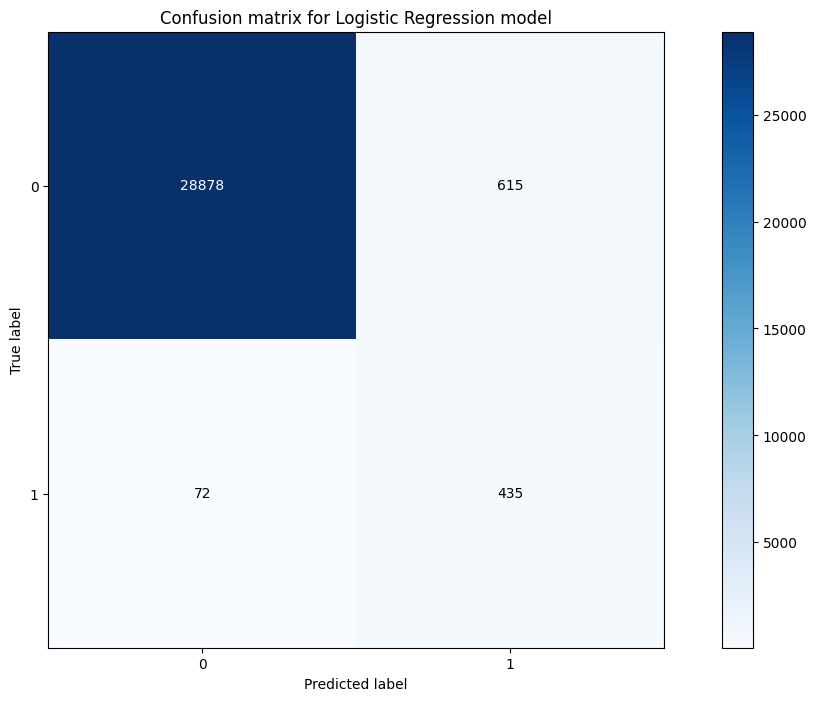

In [57]:
#Plot confusion matrix
skplot.metrics.plot_confusion_matrix(y_test,y_pred_pca,figsize=(15,8),title='Confusion matrix for Logistic Regression model')

## 8) Conclusion

#### Approaches
I've tried two approaches to complete this task, which is I'm using **Linear Regression** and **Support Vector Classification**.

#### Result
For Linear Regression I got the total_cost = 42150 and for Support Vector Classification I got total_cost = 51120. <br> We can tried on several different model to compare the result but based on my finding, Kinear Regression perform better compare to Support Vector Classification.

#### Fine Tuning
I've tried using PCA to improve the performance of my model, but the PCA only help reduce the memory usage. The accuracy was reduced by (~1%). So, if you want to go for effieciency instead of accuracy you can use this method.